In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Hi-Fish Screen data anslysis (cont.)
# exam consistency among C5, C6 and the average C
# select stable clusters

In [1]:
#%matplotlib notebook
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time as time

## Import Data

In [2]:
print('Read files:\n','Plate 1 map.csv\n','Plate 2 map.csv\n',
      'Summary_well_data_5P1C5.csv\n','Summary_well_data_5P1C6.csv\n',
      'Summary_well_data_5P2C6.csv\n','Summary_well_data_5P2C6.csv\n')
map1 = pd.read_csv('Plate 1 map.csv')
map2 = pd.read_csv('Plate 2 map.csv')
P1C5 = pd.read_csv('Summary_well_data_5P1C5.csv')
P1C6 = pd.read_csv('Summary_well_data_5P1C6.csv').iloc[:,1:]
P2C5 = pd.read_csv('Summary_well_data_5P2C5.csv').iloc[:,:-1]
P2C6 = pd.read_csv('Summary_well_data_5P2C6.csv').iloc[:,:-1]

p1c5 = pd.merge(map1[map1['Type'] == 'Amp'].iloc[:,[2,8]], P1C5, 
                how = 'left', left_on = '384 Position.1', right_on = 'Well').set_index('Gene').iloc[:,2:]
p1c6 = pd.merge(map1[map1['Type'] == 'Amp'].iloc[:,[2,8]], P1C6, 
                how = 'left', left_on = '384 Position.1', right_on = 'Well').set_index('Gene').iloc[:,2:]
p2c5 = pd.merge(map2[map2['Type'] == 'Amp'].iloc[:,[2,8]], P2C5, 
                how = 'left', left_on = '384 Position.1', right_on = 'Well').set_index('Gene').iloc[:,2:]
p2c6 = pd.merge(map2[map2['Type'] == 'Amp'].iloc[:,[2,8]], P2C6, 
                how = 'left', left_on = '384 Position.1', right_on = 'Well').set_index('Gene').iloc[:,2:]
c5 = p1c5.append(p2c5)
c6 = p1c6.append(p2c6)
C = (c5 + c6)/ 2.

#drop columns which end by '_cnt','_norm' or start with 'Max_','Min_'
to_drop = []
for col in C.columns:
    if col[-3:]=='cnt' or col[-4:]=='norm':
        to_drop.append(col)
    elif col[:3]=='Max' or col[:3]=='Min':
        to_drop.append(col)
to_use = list(set(C.columns) - set(to_drop))
Cc = C[to_use]
Cc5 = c5[to_use]
Cc6 = c6[to_use]

print('{} features to use, {} features dropped.'.format(len(to_use), len(to_drop)))
#print('{} features to use:\n\n{}\n\n{} features dropped:\n\n{}'.format(len(to_use), to_use, len(to_drop),to_drop))

#replace gene names
Genes = C.index.tolist()
His2B = 'His2B:CG33870 | His2B:CG33868 | His2B:CG33882 | His2B:CG33894 | His2B:CG33876 | His2B:CG33892 | His2B:CG33910 | His2B:CG33898 | His2B:CG33872 | His2B:CG33908 | His2B:CG33888 | His2B:CG33902 | His2B:CG33890 | His2B:CG33886 | His2B:CG33874 | His2B:CG33884 | His2B:CG33878 | His2B:CG17949 | His2B:CG33906 | His2B:CG33904 | His2B:CG33900 | His2B:CG33880 | His2B:CG33896 '
His3 = 'His3:CG33818 | His3:CG33815 | His3:CG33857 | His3:CG33833 | His3:CG33839 | His3:CG33806 | His3:CG33866 | His3:CG33863 | His-Psi:CR31754 | His3:CG33842 | His3:CG33827 | His3:CG33812 | His3:CG33860 | His3:CG33824 | His3:CG31613 | His3:CG33809 | His3:CG33848 | His3:CG33845 | His3:CG33821 | His3:CG33851 | His3:CG33830 | His3:CG33836 | His3:CG33803 | His3:CG33854 '
Hsp = 'Hsp70Bb | Hsp70Ba | Hsp70Bc | Hsp70Bbb '
#print(Gene.index(His),Gene.index(Hsp))
Genes[Genes.index(His2B)] = 'His2B:CG+'
Genes[Genes.index(His3)] = 'His3:CG+'
Genes[Genes.index(Hsp)] = 'Hsp70B+'
#Replace multiplicated names
Repeats = set([x for x in Genes if Genes.count(x) >1])
print('{} genes have repeats.'.format(len(Repeats)))
#print('\n{} genes have repeats:\n\n {}'.format(len(Repeats), Repeats))
for i in [1,2,3]:
    for r in list(Repeats):
        if r in Genes:
            Genes[Genes.index(r)] = r + '_' + str(i)
#Specify genes of interest
Interest=['slmb ','lin19 ','Cap-H2 ','skpA ','CkIalpha ','tlk ','RunxB ','CG12592 | sle ','sle ']
#Index ready           
Cc.index = Genes
Cc5.index = Genes
Cc6.index = Genes
#print(len(Genes),Genes[375])

C10 = pd.read_csv('C10.csv')
C10 = C10[['Genes', 'spcl_laplacian','k-mean', 'ward_connection', 'spcl_nneighbors']]
#C10.drop(['ward','spcl_rbf', 'birch'], axis=1, inplace= True)

Read files:
 Plate 1 map.csv
 Plate 2 map.csv
 Summary_well_data_5P1C5.csv
 Summary_well_data_5P1C6.csv
 Summary_well_data_5P2C6.csv
 Summary_well_data_5P2C6.csv

29 features to use, 46 features dropped.
61 genes have repeats.


In [19]:
#'His3:CG+' in Genes

True

## Feature Scaling

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
C_normalized = scaler.fit(Cc).transform(Cc)  # type numpy array
C_normalized5 = scaler.fit(Cc5).transform(Cc5)
C_normalized6 = scaler.fit(Cc6).transform(Cc6)

## PCA

In [4]:
## PCA
#http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95).fit(C_normalized) # preserve 95% variance
c_pca = pca.transform(C_normalized) # numpy array

c_pca5 = PCA(n_components = 0.95).fit(C_normalized5).transform(C_normalized5)
c_pca6 = PCA(n_components = 0.95).fit(C_normalized6).transform(C_normalized6)

#pca.n_components_ 
print('PCA reduces data size from {} to {} and preserves 95% of variance'
      .format(C_normalized.shape,c_pca.shape))

PCA reduces data size from (424, 29) to (424, 10) and preserves 95% of variance


## Build my visualizer

In [7]:
#Plotting PCA2D
def myPCAmap(pcaarray,labellist=[],ylim=(-14,14),whichplate=None):

    plt.figure(figsize=(12,9))
    plt.scatter(pcaarray[:,0], pcaarray[:,1], s=40, c= 'grey', alpha=0.3)   
    
    pca=pd.DataFrame(pcaarray[:,0:2],columns=('PC1','PC2'))
    pca['txt']=Genes
    df = pca.loc[pca['txt'].isin(labellist)]
    
    for txt, x, y in zip(df['txt'].tolist(), df['PC1'].tolist(), df['PC2'].tolist()):
        plt.annotate(txt,xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='grey', alpha=0.05),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.ylim(ylim)
    plt.xlim(-11,30)
    plt.title('\'Undistorted\' mapping of genes ({})\n'.format(whichplate), fontsize='large')
#plt.savefig('PCA mapping.pdf')
    plt.show()
    plt.close()
    return

In [8]:
#t-SNE plot
#http://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html

#plt.scatter(C_kmean2d['PC1'], C_kmean2d['PC2'], c= C_kmean2d['Label'], cmap='tab20', alpha=0.5)
#print(cm)
#cm.colors[19]
st = time.time()
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=150.0,n_iter=1500,random_state = 0)
c_tsne_plot = tsne.fit_transform(C_normalized)
C_tsne_plot= pd.DataFrame(c_tsne_plot, index=C.index, columns=('TC1','TC2'))
C_tsne_plot['txt'] = Genes
elapsed_time = time.time() - st
#print('time: {0:.5f}s\n'.format(elapsed_time))

In [33]:
#<matplotlib.colors.ListedColormap object at 0x1133ab6d8>
#https://matplotlib.org/api/_as_gen/matplotlib.colors.ListedColormap.html

# Have colormaps separated into categories:
# http://matplotlib.org/examples/color/colormaps_reference.html
cm = plt.cm.get_cmap('tab20')
mk = ('*','o')
def myVisualizer(colorlabel,labelname='unknown label',labellist=[]):
    C_tsne_plot['color'] = colorlabel
    clusters= np.unique(colorlabel)
    
    plt.figure(figsize=(6.5,5))
    for i in clusters:
        df = C_tsne_plot[C_tsne_plot['color']== i]
        plt.scatter(df['TC1'], df['TC2'], s=30, c= cm.colors[i],marker= mk[i%2], alpha=0.6, label = str(i))    
    
    df = C_tsne_plot.loc[C_tsne_plot['txt'].isin(labellist)] 
    for txt,x,y,i in zip(df['txt'].tolist(), df['TC1'].tolist(), df['TC2'].tolist(), df['color'].tolist()):
        plt.annotate(txt,xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc=cm.colors[i], alpha=0.3),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))  
    
    plt.xlabel('First t-SNE axis')
    plt.ylabel('Second t-SNE axis')
    plt.title('Cluster visualization ( by {} )'.format(labelname))
    plt.legend(title='Cluster #', loc=6, bbox_to_anchor= (1,0.5), fontsize='medium',frameon=False)
    plt.show()
    return
#myVisualizer(kmeans2.labels_, 'k-mean')


def myNameVisual(colorlabel,labelname='unknown label'):
    clusters= np.unique(colorlabel)
    C_tsne_plot['color'] = colorlabel
    
    plt.figure(figsize=(25,25))
    recycle= []
    for i in clusters:
        df = C_tsne_plot[C_tsne_plot['color']== i]
        plt.scatter(df['TC1'], df['TC2'], s=50, c= cm.colors[i],marker= mk[i%2], alpha=0.6,label = str(i))
        for txt, x, y in zip(df['txt'].tolist(), df['TC1'].tolist(), df['TC2'].tolist()):
            plt.annotate(txt,xy=(x, y), xytext=(-10, 10),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc=cm.colors[i], alpha=0.3),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
            recycle.append(i)
   
    plt.xlabel('First t-SNE axis')
    plt.ylabel('Second t-SNE axis')
    plt.title('Cluster visualization ( by {} )'.format(labelname))
    plt.legend(title='Cluster #', loc=0, borderaxespad= 5, fontsize='medium',frameon=False)
    plt.savefig('Cluster_visualization_by_{}.pdf'.format(labelname))
    plt.close()#print(colorlabel)
    return print(len(recycle))
#elapsed_time = time.time() - st
#print('time: {0:.5f}s\n'.format(elapsed_time))
#myLabelVisual(brich.labels_, 'PCA + birch')

In [ ]:
#Plotting PCA2D
print('Notice: slmb and lin19 stand out, \nwhich gives low confidence to grope these two genes with any of the others.')
plt.figure(figsize=(12,9))
plt.scatter(c_pca[:,0], c_pca[:,1], s=40, c= 'grey', alpha=0.4, label = str(i))   
for txt, x, y in zip(Genes, c_pca[:,0].tolist(), c_pca[:,1].tolist()):
    plt.annotate(txt,xy=(x, y), xytext=(0, 10),
    textcoords='offset points', ha='right', va='bottom',
    bbox=dict(boxstyle='round,pad=0.5', fc='grey', alpha=0.05),
    arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.ylim(-10,12)
plt.xlim(-10,30)
plt.title('\'Undistorted\' mapping of genes (by PCA)\n', fontsize='large')
#plt.savefig('PCA mapping.pdf')
plt.show()
plt.close()

Notice: slmb and lin19 stand out.


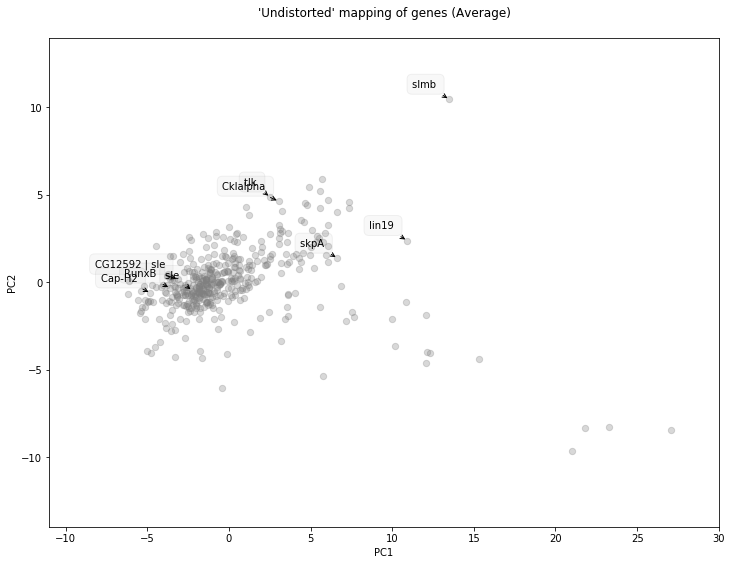

In [147]:
print('Notice: slmb and lin19 stand out.')
myPCAmap(c_pca,labellist=Interest,whichplate='Average')

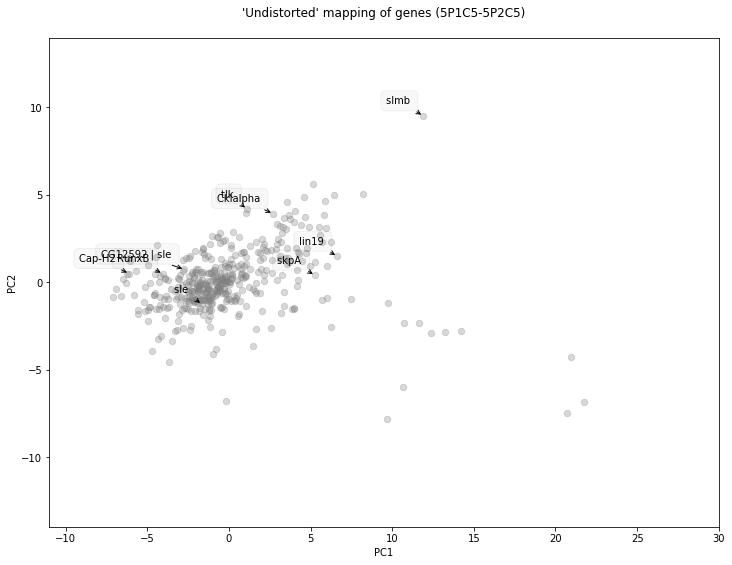

In [148]:
myPCAmap(c_pca5,labellist=Interest,whichplate='5P1C5-5P2C5')

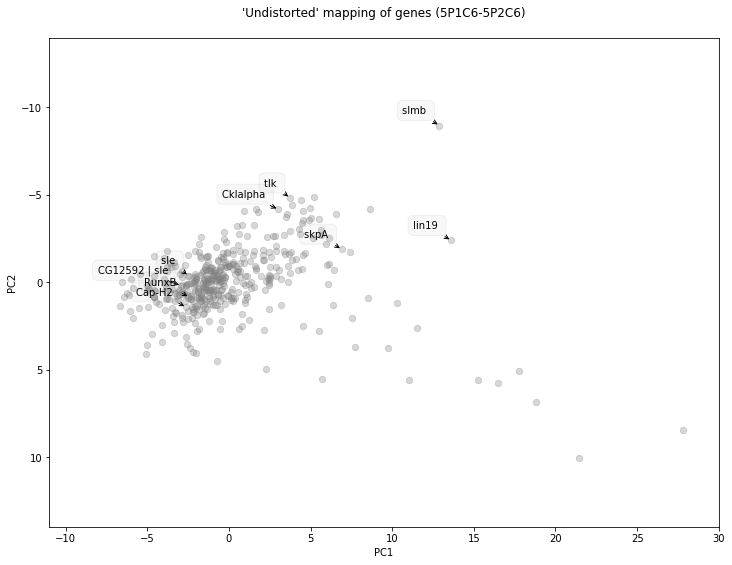

In [149]:
myPCAmap(c_pca6,labellist=Interest,whichplate='5P1C6-5P2C6',ylim=(14,-14))

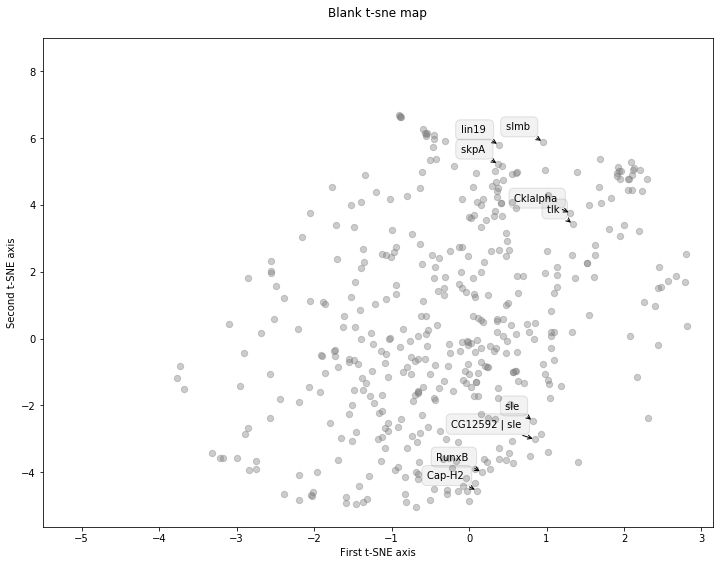

In [10]:
#Plotting blank t-sne map

plt.figure(figsize=(12,9))
plt.scatter(c_tsne_plot[:,0], c_tsne_plot[:,1], s=40, c= 'grey', alpha=0.4, label = str(i))   

df = C_tsne_plot.loc[C_tsne_plot['txt'].isin(Interest)] 
for txt,x,y in zip(df['txt'].tolist(), df['TC1'].tolist(), df['TC2'].tolist()):
    plt.annotate(txt,xy=(x, y), xytext=(-10, 10),
    textcoords='offset points', ha='right', va='bottom',
    bbox=dict(boxstyle='round,pad=0.5', fc='grey', alpha=0.1),
    arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.xlabel('First t-SNE axis')
plt.ylabel('Second t-SNE axis')
plt.xlim(-5.5,None)
plt.ylim(None,9)
plt.title('Blank t-sne map\n')
#plt.savefig('Blank t-sne map.pdf)
plt.show()
plt.close()

## k-mean

In [5]:
#k-mean
#http://scikit-learn.org/stable/modules/generated /sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans
n_labels= 15
st = time.time()

kmeans = KMeans(n_clusters=n_labels, random_state=0).fit(c_pca)
kmeans5 = KMeans(n_clusters=n_labels, random_state=0).fit(c_pca5)
kmeans6 = KMeans(n_clusters=n_labels, random_state=0).fit(c_pca6)

elapsed_time = time.time() - st
#print('K-mean time: {0:.5f}s\n '.format(elapsed_time))
#myVisualizer(kmeans6.labels_, 'PCA + k-mean', Interest)
#myVisualizer(kmeans5.labels_, 'PCA + k-mean')
#myVisualizer(kmeans6.labels_, 'PCA + k-mean')

## AgglomerativeClustering - ward

In [6]:
#http://scikit-learn.org/0.15/modules/generated/sklearn.cluster.Ward.html
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
n_labels= 15

'''linkage : {“ward”, “complete”, “average”}'''
# with connectivity constraints
st = time.time()
connectivity = kneighbors_graph(c_pca, n_neighbors=20, include_self=False)
wardcn = AgglomerativeClustering(n_clusters=n_labels, connectivity= connectivity, linkage='ward').fit(c_pca)

connectivity5 = kneighbors_graph(c_pca5, n_neighbors=20, include_self=False)
connectivity6 = kneighbors_graph(c_pca6, n_neighbors=20, include_self=False)
wardcn5 = AgglomerativeClustering(n_clusters=n_labels, connectivity= connectivity5, linkage='ward').fit(c_pca5)
wardcn6 = AgglomerativeClustering(n_clusters=n_labels, connectivity= connectivity6, linkage='ward').fit(c_pca6)

elapsed_time = time.time() - st
#print('Ward with connectivity time: {0:.5f}s\n '.format(elapsed_time))

#myVisualizer(wardcn.labels_, 'PCA + Wardcn',Interest)
#myVisualizer(wardcn5.labels_, 'PCA + Wardcn')
#myVisualizer(wardcn6.labels_, 'PCA + Wardcn')

## SpectralClustering

In [7]:
#http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html
from sklearn.cluster import SpectralClustering
n_labels= 20

'''SpectralClustering(n_clusters=8, eigen_solver=None, random_state=None, n_init=10, gamma=1.0, 
affinity=’rbf’, n_neighbors=10, eigen_tol=0.0, assign_labels=’kmeans’, degree=3, coef0=1, 
kernel_params=None, n_jobs=-1)

affinity='laplacian',‘nearest_neighbors’, ‘rbf’
'''

#spcl_nneighbors
st = time.time()
spcl_nneighbors = SpectralClustering(n_clusters=n_labels,eigen_solver='arpack', random_state=1, n_init=20, gamma=1.0, 
affinity='nearest_neighbors',n_neighbors=100,assign_labels='discretize').fit(c_pca)

spcl_nneighbors5 = SpectralClustering(n_clusters=n_labels,eigen_solver='arpack', random_state=1, n_init=20, gamma=1.0, 
affinity='nearest_neighbors',n_neighbors=100,assign_labels='discretize').fit(c_pca5)
spcl_nneighbors6 = SpectralClustering(n_clusters=n_labels,eigen_solver='arpack', random_state=1, n_init=20, gamma=1.0, 
affinity='nearest_neighbors',n_neighbors=100,assign_labels='discretize').fit(c_pca6)


elapsed_time = time.time() - st
#print('spcl_nneighbors time: {0:.5f}s\n '.format(elapsed_time))
#myVisualizer(spcl_nneighbors.labels_, 'PCA + spcl_nneighbors', Interest)

#spcl_laplacian
st = time.time()
spcl_laplacian = SpectralClustering(n_clusters=n_labels,eigen_solver='arpack', random_state=1, n_init=20, gamma=1.0, 
affinity='laplacian',eigen_tol=0.0, assign_labels='discretize').fit(c_pca)

spcl_laplacian5 = SpectralClustering(n_clusters=n_labels,eigen_solver='arpack', random_state=1, n_init=20, gamma=1.0, 
affinity='laplacian',eigen_tol=0.0, assign_labels='discretize').fit(c_pca5)
spcl_laplacian6 = SpectralClustering(n_clusters=n_labels,eigen_solver='arpack', random_state=1, n_init=20, gamma=1.0, 
affinity='laplacian',eigen_tol=0.0, assign_labels='discretize').fit(c_pca6)

elapsed_time = time.time() - st
#print('spcl_laplacian time: {0:.5f}s\n '.format(elapsed_time))
#myVisualizer(spcl_laplacian.labels_, 'PCA + spcl_laplacian', Interest)

## Brich

In [8]:
#hhttp://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html
from sklearn.cluster import Birch
st = time.time()
n_labels=20
brich = Birch(threshold=0.1, branching_factor=20, n_clusters=n_labels, compute_labels=True, copy=True).fit(c_pca)

brich5 = Birch(threshold=0.1, branching_factor=20, n_clusters=n_labels, compute_labels=True, copy=True).fit(c_pca5)
brich6 = Birch(threshold=0.1, branching_factor=20, n_clusters=n_labels, compute_labels=True, copy=True).fit(c_pca6)

elapsed_time = time.time() - st
#print('Birch time: {0:.5f}s\n'.format(elapsed_time))
#myVisualizer(brich.labels_, 'PCA + Brich',Interest)

## Collective Plotting

In [9]:
# collect arguments
Labels = [kmeans.labels_,wardcn.labels_,spcl_nneighbors.labels_,
          spcl_laplacian.labels_,brich.labels_]
Labels5 = [kmeans5.labels_,wardcn5.labels_,spcl_nneighbors5.labels_,
          spcl_laplacian5.labels_,brich5.labels_]
Labels6 = [kmeans6.labels_,wardcn6.labels_,spcl_nneighbors6.labels_,
          spcl_laplacian6.labels_,brich6.labels_]
labelnames = ['k-mean','ward_connection','spcl_nneighbors','spcl_laplacian','birch']
lbnames = ['k-mn','wrd_cn','sp_nn','sp_lp','brch']

In [27]:
Cavg = pd.DataFrame(np.array(Labels).transpose(), columns= lbnames)
P_C5 = pd.DataFrame(np.array(Labels5).transpose(),columns=[x+'_5' for x in lbnames])
P_C6 = pd.DataFrame(np.array(Labels6).transpose(),columns=[x+'_6' for x in lbnames])

C_all = pd.concat([Cavg,P_C5,P_C6], axis=1) # all labels sheet
C_all['Genes'] = Genes
C_all.to_csv('C_all.csv')

In [146]:
# create a 5x3 grid of subplots
st = time.time()

fig,((Ax0,ax0,ay0),(Ax1,ax1,ay1),(Ax2,ax2,ay2),(Ax3,ax3,ay3),(Ax4,ax4,ay4)) = plt.subplots(5,3,figsize=(30,40),
                                                                                           sharex=True, sharey=True)
fig.suptitle('Checking the clustering consistency across 5P_C5, 5P_C6 and the Average', fontsize=40) #set main title
plt.subplots_adjust(wspace=0.3) #set space between subplots

Axs = [Ax0,Ax1,Ax2,Ax3,Ax4]
axs5 = [ax0,ax1,ax2,ax3,ax4]
axs6 = [ay0,ay1,ay2,ay3,ay4]

Interest=['slmb ','lin19 ','Cap-H2 ','skpA ','CkIalpha ','tlk ','RunxB ','CG12592 | sle ','sle ']

def subVisualizer(whichsub,colorlabel,whichplate,labelname='unknown label',labellist = Interest):
    C_tsne_plot['color'] = colorlabel
    clusters= np.unique(colorlabel)
    mk=['*','o']
    for i in clusters:
        df = C_tsne_plot[C_tsne_plot['color']== i]
        whichsub.scatter(df['TC1'], df['TC2'], s=30, c= cm.colors[i], marker= mk[i%2], alpha=0.4, label = str(i))
        whichsub.set_title('{} through PCA clustered by {}'.format(whichplate, labelname))
        whichsub.legend(title='Cluster #',loc=3, bbox_to_anchor= (1,0), ncol=1, fontsize='medium',frameon=False)
    
    df = C_tsne_plot.loc[C_tsne_plot['txt'].isin(labellist)] 
    for txt,x,y,i in zip(df['txt'].tolist(), df['TC1'].tolist(), df['TC2'].tolist(), df['color'].tolist()):
        whichsub.annotate(txt,xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc=cm.colors[i], alpha=0.3),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))    
    return

for n in range(5):
    subVisualizer(Axs[n],Labels[n],'Average',labelnames[n])
    subVisualizer(axs5[n],Labels5[n],'5P1C5-5P2C5',labelnames[n])
    subVisualizer(axs6[n],Labels6[n],'5P1C6-5P2C6',labelnames[n])

plt.savefig("NewSummary.pdf")
plt.close()

elapsed_time = time.time() - st
#print('Plotting time: {0:.5f}s\n')
print('Check file NewSummary.pdf'.format(elapsed_time))    

#necessary on some systems to update the plot
#plt.gcf().canvas.draw()

Check file NewSummary.pdf


## Manually pick stable clusters

In [10]:
C_all = pd.read_csv('C_all.csv').iloc[:,1:]
whatt = C_all.set_index('Genes')
whatt.head()

,k-mn,wrd_cn,sp_nn,sp_lp,brch,k-mn_5,wrd_cn_5,sp_nn_5,sp_lp_5,brch_5,k-mn_6,wrd_cn_6,sp_nn_6,sp_lp_6,brch_6
Genes,,,,,,,,,,,,,,,
eIF2B-delta _1,5,13,0,0,12,11,14,0,1,14,0,9,0,18,4
CG3817 _1,11,1,11,10,1,7,2,10,11,4,0,9,17,18,4
CycC,4,4,4,13,5,5,6,0,3,5,10,7,11,7,3
CG4673 _1,0,1,0,2,12,12,4,3,1,6,0,9,17,18,4
CG13482 _1,4,4,10,13,5,14,12,18,19,12,3,11,5,13,5


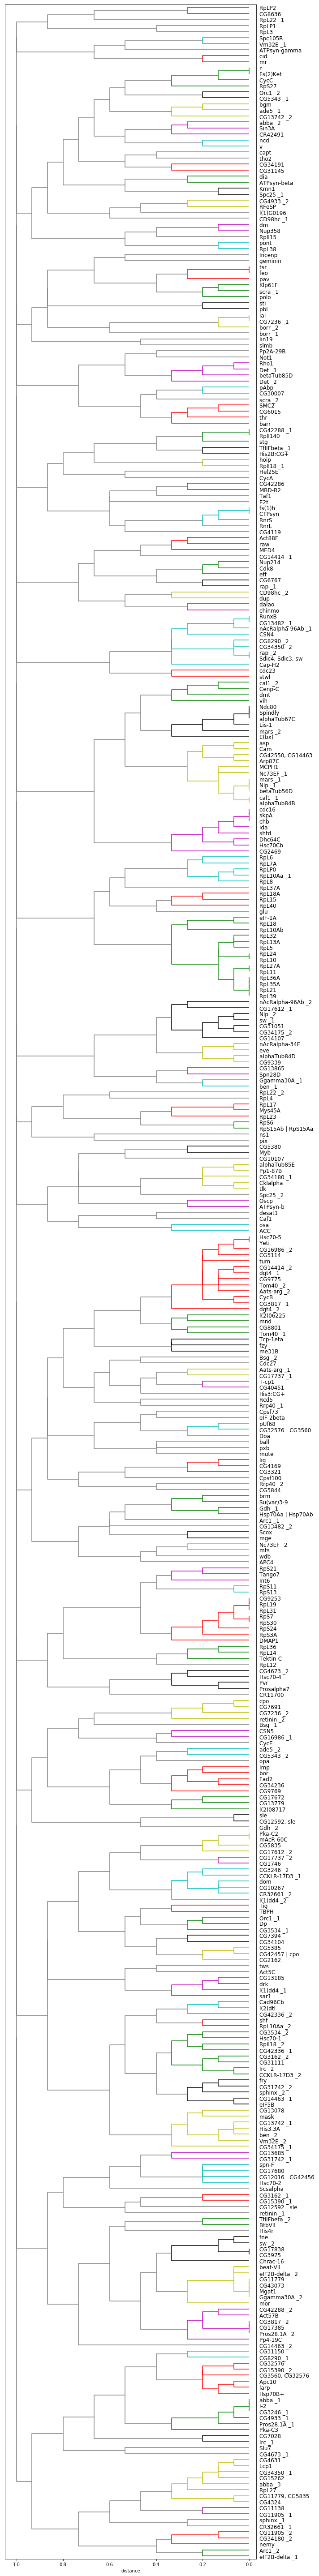

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Calculate the distance between each sample
Zwhat= linkage(whatt, 'complete', metric='Hamming') # Hamming distance
plt.figure(figsize=(10,80))
dendrogram(
    Zwhat,
    orientation="left",
    labels=whatt.index,
    leaf_rotation=0,  # rotates the x axis labels
    leaf_font_size=12,  # font size for the x axis labels
    color_threshold=0.4, 
    above_threshold_color='grey'
)
plt.xlabel('distance')
plt.xlim(1.05,-0.03)
plt.tight_layout() 
plt.savefig("Hamming_distance.pdf")
plt.show()
plt.close()


In [62]:
#lbnames = ['k-mn','wrd_cn','sp_nn','sp_lp','brch']
C_all = pd.read_csv('C_all.csv').iloc[:,1:]
what= C_all.set_index('Genes')
clt1= what[(what['sp_lp'] ==12) & (what['k-mn'] == 1)]
clt2= what[(what['sp_lp']==4)]
clt3= what[(what['sp_lp']==18)&(what['wrd_cn']==8)&(what['sp_nn']==18)]
clt4= what[(what['k-mn']==4)&(what['sp_nn']==10)&(what['sp_nn_5']==18)]
clt5= what[(what['wrd_cn']==9)&(what['sp_nn']==5)]
clt6= what[(what['sp_lp']==6)&(what['k-mn']==3)&(what['wrd_cn']==8)]
clt7= what[(what['k-mn']==0)&(what['k-mn_5']==4)&(what['k-mn_6']==14)]

print('Manually picked 7 clusters.\n')
for i,t in enumerate([clt1,clt2,clt3,clt4,clt5,clt6,clt7]):
   print('Picked cluster {} contains {} genes:\n{}\n\n'.format(i+1,t.shape[0], t.index.tolist()))
    #print(t)

Manually picked 7 clusters.

Picked cluster 1 contains 8 genes:
['scra _1', 'feo ', 'Klp61F ', 'tsr ', 'pav ', 'pbl ', 'polo ', 'sti ']


Picked cluster 2 contains 4 genes:
['borr _1', 'CG7236 _1', 'ial ', 'borr _2']


Picked cluster 3 contains 0 genes:
[]


Picked cluster 4 contains 12 genes:
['CG13482 _1', 'CG12592 | sle ', 'stwl ', 'chinmo ', 'nAcRalpha-96Ab _1', 'CG34350 _2', 'Sdic4, Sdic3, sw ', 'CG8290 _2', 'CSN4 ', 'RunxB ', 'Cap-H2 ', 'rap _2']


Picked cluster 5 contains 11 genes:
['Not1 ', 'CG30007 ', 'Det _1', 'CG6015 ', 'betaTub85D ', 'Rho1 ', 'SMC2 ', 'thr ', 'Det _2', 'scra _2', 'barr ']


Picked cluster 6 contains 10 genes:
['alphaTub84B ', 'cal1 _1', 'skpA ', 'cdc16 ', 'ida ', 'shtd ', 'chb ', 'Hsc70Cb ', 'Dhc64C ', 'CG2469 ']


Picked cluster 7 contains 11 genes:
['RpS30 ', 'RpL19 ', 'RpS7 ', 'Int6 ', 'RpS3A ', 'Tango7 ', 'RpS21 ', 'RpS24 ', 'CG9253 ', 'RpL31 ', 'DMAP1 ']




In [63]:
print('Cluster 1:')
clt1

Cluster 1:


,k-mn,wrd_cn,sp_nn,sp_lp,brch,k-mn_5,wrd_cn_5,sp_nn_5,sp_lp_5,brch_5,k-mn_6,wrd_cn_6,sp_nn_6,sp_lp_6,brch_6
Genes,,,,,,,,,,,,,,,
scra _1,1,2,13,12,19,9,1,4,8,3,11,3,1,16,9
feo,1,2,13,12,10,9,1,4,8,3,11,14,1,2,14
Klp61F,1,2,13,12,19,9,1,4,8,16,11,3,1,11,9
tsr,1,2,13,12,10,9,1,4,8,3,11,14,1,2,14
pav,1,2,13,12,19,9,1,4,8,3,1,10,1,2,10
pbl,1,2,13,12,10,4,0,4,13,0,1,10,1,11,10
polo,1,2,13,12,18,1,1,4,8,3,11,3,1,11,9
sti,1,2,13,12,19,8,0,15,13,0,1,10,1,11,10


In [64]:
print('Cluster 2:')
clt2

Cluster 2:


,k-mn,wrd_cn,sp_nn,sp_lp,brch,k-mn_5,wrd_cn_5,sp_nn_5,sp_lp_5,brch_5,k-mn_6,wrd_cn_6,sp_nn_6,sp_lp_6,brch_6
Genes,,,,,,,,,,,,,,,
borr _1,7,14,13,4,14,3,9,4,2,19,11,3,1,16,9
CG7236 _1,7,6,13,4,6,13,7,4,2,2,12,1,1,2,1
ial,7,6,13,4,6,13,7,4,2,2,12,1,1,2,1
borr _2,7,6,13,4,6,13,7,4,2,2,6,1,1,2,18


In [65]:
print('Cluster 3:')
clt3

Cluster 3:


,k-mn,wrd_cn,sp_nn,sp_lp,brch,k-mn_5,wrd_cn_5,sp_nn_5,sp_lp_5,brch_5,k-mn_6,wrd_cn_6,sp_nn_6,sp_lp_6,brch_6
Genes,,,,,,,,,,,,,,,


In [66]:
print('Cluster 4:')
clt4

Cluster 4:


,k-mn,wrd_cn,sp_nn,sp_lp,brch,k-mn_5,wrd_cn_5,sp_nn_5,sp_lp_5,brch_5,k-mn_6,wrd_cn_6,sp_nn_6,sp_lp_6,brch_6
Genes,,,,,,,,,,,,,,,
CG13482 _1,4,4,10,13,5,14,12,18,19,12,3,11,5,13,5
CG12592 | sle,4,4,10,13,5,0,13,18,14,13,3,11,16,0,5
stwl,4,4,10,13,5,14,12,18,19,12,13,9,6,8,4
chinmo,4,4,10,13,5,5,6,18,3,5,3,11,5,13,5
nAcRalpha-96Ab _1,4,4,10,13,5,14,12,18,19,12,3,11,13,13,5
CG34350 _2,4,4,10,13,5,14,12,18,10,12,0,11,0,0,5
"Sdic4, Sdic3, sw",4,4,10,13,5,14,12,18,10,12,0,11,13,0,5
CG8290 _2,4,4,10,13,5,14,12,18,10,12,0,11,16,0,5
CSN4,4,4,10,13,5,14,12,18,10,12,3,0,15,13,6


In [67]:
print('Cluster 5:')
clt5

Cluster 5:


,k-mn,wrd_cn,sp_nn,sp_lp,brch,k-mn_5,wrd_cn_5,sp_nn_5,sp_lp_5,brch_5,k-mn_6,wrd_cn_6,sp_nn_6,sp_lp_6,brch_6
Genes,,,,,,,,,,,,,,,
Not1,2,9,5,19,0,7,14,14,11,14,2,3,12,5,19
CG30007,2,9,5,19,0,2,11,5,5,4,5,4,18,5,0
Det _1,13,9,5,19,0,8,11,5,5,4,11,3,12,14,19
CG6015,2,9,5,19,0,2,11,5,5,4,7,2,12,14,11
betaTub85D,13,9,5,19,0,1,11,4,7,4,11,3,12,14,19
Rho1,13,9,5,19,0,2,11,5,5,4,11,3,12,14,19
SMC2,2,9,5,19,0,2,11,5,5,4,7,6,12,14,17
thr,2,9,5,19,0,2,11,5,5,4,13,9,12,18,4
Det _2,13,9,5,19,0,8,0,5,5,7,11,3,12,14,19


In [68]:
print('Cluster 6:')
clt6

Cluster 6:


,k-mn,wrd_cn,sp_nn,sp_lp,brch,k-mn_5,wrd_cn_5,sp_nn_5,sp_lp_5,brch_5,k-mn_6,wrd_cn_6,sp_nn_6,sp_lp_6,brch_6
Genes,,,,,,,,,,,,,,,
alphaTub84B,3,8,18,6,8,8,0,9,7,7,4,2,14,8,11
cal1 _1,3,8,18,6,8,8,0,9,7,7,4,2,14,8,11
skpA,3,8,5,6,8,8,0,5,7,7,2,13,3,5,13
cdc16,3,8,5,6,8,8,0,5,7,7,2,13,3,5,13
ida,3,8,5,6,8,8,0,9,7,7,2,13,3,5,13
shtd,3,8,18,6,8,8,0,5,7,7,2,13,3,5,13
chb,3,8,5,6,8,8,0,5,7,7,2,13,3,5,13
Hsc70Cb,3,8,18,6,8,8,0,9,7,7,2,13,3,8,13
Dhc64C,3,8,18,6,8,8,0,5,7,7,2,13,3,8,13


In [69]:
print('Cluster 7:')
clt7

Cluster 7:


,k-mn,wrd_cn,sp_nn,sp_lp,brch,k-mn_5,wrd_cn_5,sp_nn_5,sp_lp_5,brch_5,k-mn_6,wrd_cn_6,sp_nn_6,sp_lp_6,brch_6
Genes,,,,,,,,,,,,,,,
RpS30,0,0,7,2,9,4,3,2,16,17,14,5,9,19,2
RpL19,0,0,7,2,9,4,3,2,16,17,14,5,9,12,2
RpS7,0,0,7,2,9,4,3,2,16,17,14,5,9,19,2
Int6,0,0,7,2,9,4,3,2,16,17,14,4,2,12,0
RpS3A,0,0,2,2,9,4,3,2,16,17,14,5,8,19,2
Tango7,0,0,7,2,9,4,3,19,16,17,14,0,9,12,6
RpS21,0,0,14,2,16,4,3,2,16,17,14,0,9,12,6
RpS24,0,0,14,2,9,4,3,2,16,17,14,5,9,12,2
CG9253,0,0,7,2,9,4,3,2,16,17,14,5,9,12,2


In [59]:
what['select'] = 0
#recycle=[]
for n,t in enumerate([clt1,clt2,clt3,clt4,clt5,clt6,clt7]):
    for x in t.index.tolist():
        what.loc[x]['select'] = n+1
#        recycle.append(1)
whatlabel= np.array(what['select'])
#sum(recycle)

Notice: cluster 4 includes Cap-H2, RunxB.
slmb and lin19 stand out, which gives low confidence to grope these two genes with any of the others.


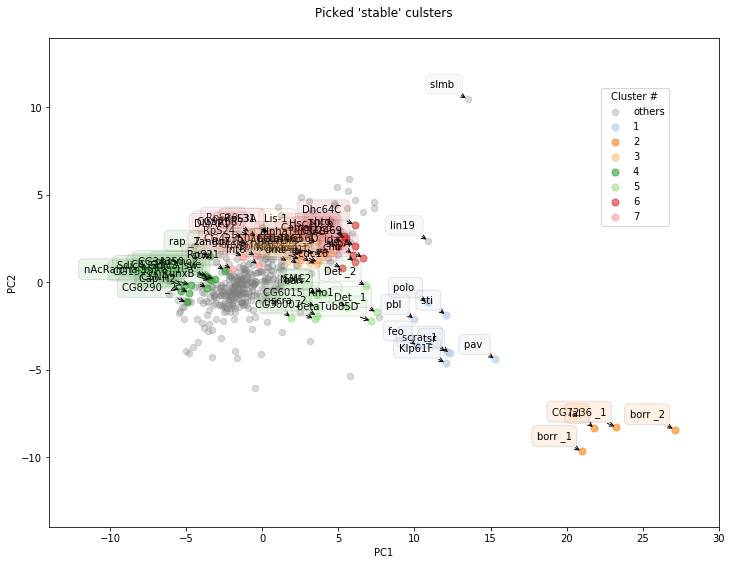

In [139]:
#Plotting PCA2D
print('Notice: cluster 4 includes Cap-H2, RunxB.')
print('slmb and lin19 stand out, which gives low confidence to grope these two genes with any of the others.')
plt.figure(figsize=(12,9))
clusters= np.unique(whatlabel)
c_pca_plot=pd.DataFrame(c_pca[:,0:2],columns=('PC1','PC2'))
c_pca_plot['txt'] = Genes
c_pca_plot['color'] = whatlabel
cm = plt.cm.get_cmap('tab20')

recycle=[]
for i in [0]:
        df = c_pca_plot[c_pca_plot['color']== i]
        plt.scatter(df['PC1'], df['PC2'], s=40, c= 'grey', alpha=0.3, label='others')
        for txt in df['txt'].tolist():
            recycle.append(1)           

for i in clusters[1:]:
        df = c_pca_plot[c_pca_plot['color']== i]
        plt.scatter(df['PC1'], df['PC2'], s=50, c= cm.colors[i],alpha=0.6,label= str(i))
        for txt, x, y in zip(df['txt'].tolist(), df['PC1'].tolist(), df['PC2'].tolist()):
            plt.annotate(txt,xy=(x, y), xytext=(-10, 10),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc=cm.colors[i], alpha=0.1),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
            recycle.append(1)

Morelabel=['slmb ','lin19 ']
df = c_pca_plot.loc[c_pca_plot['txt'].isin(Morelabel)]
for txt, x, y in zip(df['txt'].tolist(), df['PC1'].tolist(), df['PC2'].tolist()):
    plt.annotate(txt,xy=(x, y), xytext=(-10, 10),
    textcoords='offset points', ha='right', va='bottom',
    bbox=dict(boxstyle='round,pad=0.5', fc='grey', alpha=0.05),
    arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))            

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.ylim(-14,14)
plt.xlim(-14,30)
plt.legend(title='Cluster #', loc=0, borderaxespad= 5, fontsize='medium')
plt.title('Picked \'stable\' culsters\n', fontsize='large')
#plt.savefig('PCA mapping.pdf')
plt.show()
plt.close()
#print('sum_recycle: {}'.format(sum(recycle)))

      

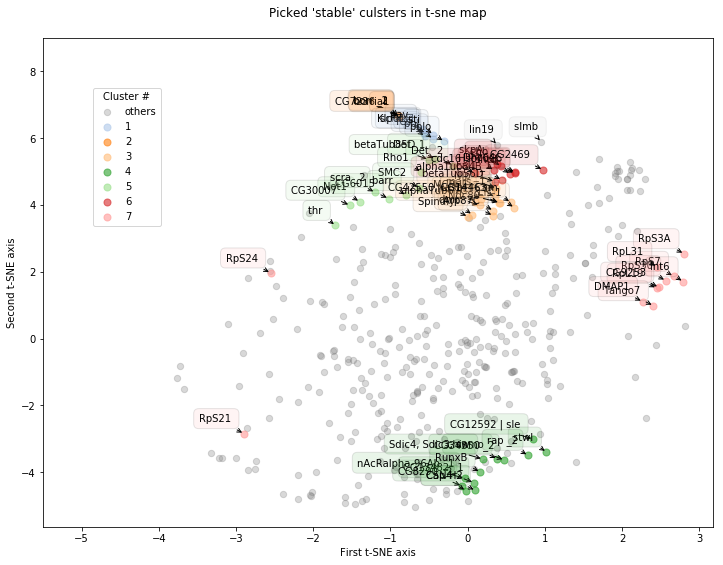

In [131]:
#Plotting picked clusters in t-sne map

recycle=[]
recyclelen=0

plt.figure(figsize=(12,9))
clusters= np.unique(whatlabel)
C_tsne_plot['color'] = whatlabel
cm = plt.cm.get_cmap('tab20')

for i in [0]:
        df = C_tsne_plot[C_tsne_plot['color']== i]
        recyclelen += len(df)
        plt.scatter(df['TC1'], df['TC2'], s=40, c= 'grey', alpha=0.3, label='others')
        for txt, x, y in zip(df['txt'].tolist(), df['TC1'].tolist(), df['TC2'].tolist()):
            recycle.append(1)
#            plt.annotate(txt,xy=(x, y), xytext=(-10, 10),textcoords='offset points', ha='right', va='bottom',
#            bbox=dict(boxstyle='round,pad=0.5', fc=cm.colors[i], alpha=0.1),arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
            

for i in clusters[1:]:
        df = C_tsne_plot[C_tsne_plot['color']== i]
        plt.scatter(df['TC1'], df['TC2'], s=50, c= cm.colors[i],alpha=0.6,label = str(i))
        #print(df.head())
        recyclelen += len(df)
        for txt, x, y in zip(df['txt'].tolist(), df['TC1'].tolist(), df['TC2'].tolist()):
            plt.annotate(txt,xy=(x, y), xytext=(-10, 10),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc=cm.colors[i], alpha=0.1),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
            recycle.append(1)

Morelabel=['slmb ','lin19 ']
df = C_tsne_plot.loc[C_tsne_plot['txt'].isin(Morelabel)]
for txt, x, y in zip(df['txt'].tolist(), df['TC1'].tolist(), df['TC2'].tolist()):
    plt.annotate(txt,xy=(x, y), xytext=(0, 10),
    textcoords='offset points', ha='right', va='bottom',
    bbox=dict(boxstyle='round,pad=0.5', fc='grey', alpha=0.05),
    arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))            

            
plt.xlabel('First t-SNE axis')
plt.ylabel('Second t-SNE axis')
plt.xlim(-5.5,None)
plt.ylim(None,9)
plt.legend(title='Cluster #', loc=0, borderaxespad= 5, fontsize='medium')
plt.title('Picked \'stable\' culsters in t-sne map\n')
#plt.savefig('Blank t-sne map.pdf)
plt.show()
plt.close()
#print('sum_recycle: {}, recyclelen: {}'.format(sum(recycle),recyclelen))
#print('time: {0:.5f}s\n'.format(elapsed_time))

In [133]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')